# Fragment spectrum generation

Generating theoretical fragment spectra is central to many
identification tasks in computational mass spectrometry.
TheoreticalSpectrumGenerator can be configured to generate tandem MS
spectra from a given peptide charge combination. There are various
parameters which influence the generated ions e.g. simulating different
fragmentation techniques.

## Y-ion spectrum

First, we will generate a simple spectrum that only contains y-ions

In [ ]:
from pyopenms import *

tsg = TheoreticalSpectrumGenerator()
spec1 = MSSpectrum()
peptide = AASequence.fromString("DFPIANGER")
# standard behavior is adding b- and y-ions of charge 1
p = Param()
p.setValue("add_b_ions", "false")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(spec1, peptide, 1, 1) # charge range 1:1

# Iterate over annotated ions and their masses
print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

which produces all y single charged ions:

``` output
Spectrum 1 of DFPIANGER has 8 peaks.
y1+ is generated at m/z 175.118952913371
y2+ is generated at m/z 304.161547136671
y3+ is generated at m/z 361.18301123237103
y4+ is generated at m/z 475.225939423771
y5+ is generated at m/z 546.2630535832709
y6+ is generated at m/z 659.3471179341709
y7+ is generated at m/z 756.3998821574709
y8+ is generated at m/z 903.4682964445709
```

which you could plot with:

In [ ]:
import matplotlib.pyplot as plt
plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) # snap ensures that all bars are rendered
plt.xlabel("m/z")
plt.ylabel("intensity")

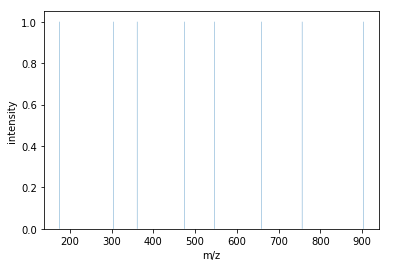

or also add ion names

In [ ]:
mz,i = spec1.get_peaks()
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False) # snap ensures that all bars are rendered
idx = 0
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[idx].decode(), ha='center', va='bottom', rotation=90)
    idx += 1
plt.ylim(top=1.2)
plt.xlabel("m/z")
plt.ylabel("intensity")

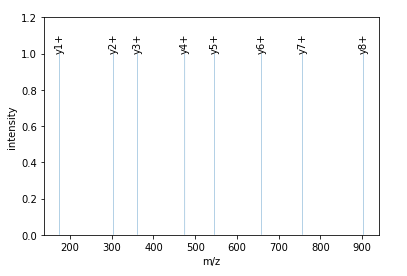

## Full fragment ion spectrum

We can also produce additional peaks in the fragment ion spectrum, such
as isotopic peaks, precursor peals, ions from higher charge states,
additional ion series, or common neutral losses:

In [ ]:
spec2 = MSSpectrum()
p.setValue("add_b_ions", "true")
p.setValue("add_a_ions", "true")
p.setValue("add_losses", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(spec2, peptide, 1, 2)

# Iterate over annotated ions and their masses
print("Spectrum 2 of", peptide, "has", spec2.size(), "peaks.")
for ion, peak in zip(spec2.getStringDataArrays()[0], spec2):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

exp = MSExperiment()
exp.addSpectrum(spec1)
exp.addSpectrum(spec2)
MzMLFile().store("DFPIANGER.mzML", exp)

which outputs all 146 peaks that are generated (this is without isotopic
peaks), here we will just show the first few peaks:

``` output
Spectrum 2 of DFPIANGER has 146 peaks.
y1-C1H2N1O1++ is generated at m/z 66.05629515817103
y1-C1H2N2++ is generated at m/z 67.05221565817102
y1-H3N1++ is generated at m/z 79.54984014222102
y1++ is generated at m/z 88.06311469007102
a2-H2O1++ is generated at m/z 109.05221565817101
a2++ is generated at m/z 118.05749819007102
b2-H2O1++ is generated at m/z 123.049673158171
y2-C1H2N1O1++ is generated at m/z 130.57759226982103
y1-C1H2N1O1+ is generated at m/z 131.10531384957102
y2-C1H2N2++ is generated at m/z 131.573512769821
b2++ is generated at m/z 132.054955690071
y1-C1H2N2+ is generated at m/z 133.097154849571
y2-H2O1++ is generated at m/z 143.579129269821
y2-H3N1++ is generated at m/z 144.07113725387103
y2++ is generated at m/z 152.58441180172102
[...]
```

which you again can visualize with:

In [ ]:
import matplotlib.pyplot as plt
plt.bar(spec2.get_peaks()[0], spec2.get_peaks()[1], snap=False) # snap ensures that all bars are rendered
plt.xlabel("m/z")
plt.ylabel("intensity")

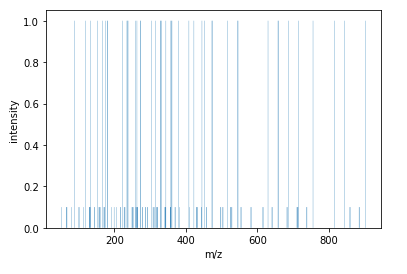

The first example shows how to put peaks of a certain type, y-ions in
this case, into a spectrum. The second spectrum is filled with a
complete fragment ion spectrum of all peaks (a-, b-, y-ions and losses).
The losses are based on commonly observed fragment ion losses for
specific amino acids and are defined in the `Residues.xml` file, which
means that not all fragment ions will produce all possible losses, as
can be observed above: water loss is not observed for the y1 ion but for
the y2 ion since glutamic acid can have a neutral water loss but
arginine cannot. Similarly, only water loss and no ammonia loss is
simulated in the `a/b/c` ion series with the first fragment capable of
ammonia loss being asparagine at position 6.

The `TheoreticalSpectrumGenerator` has many parameters which have a
detailed description located in the class documentation. Note how the
`add_metainfo` parameter populates the `StringDataArray` of the output
spectrum, allowing us to iterate over annotated ions and their masses.

## Visualization

We can now visualize the resulting spectra using TOPPView when we open
the DFPIANGER.mzML file that we produced above in TOPPView:

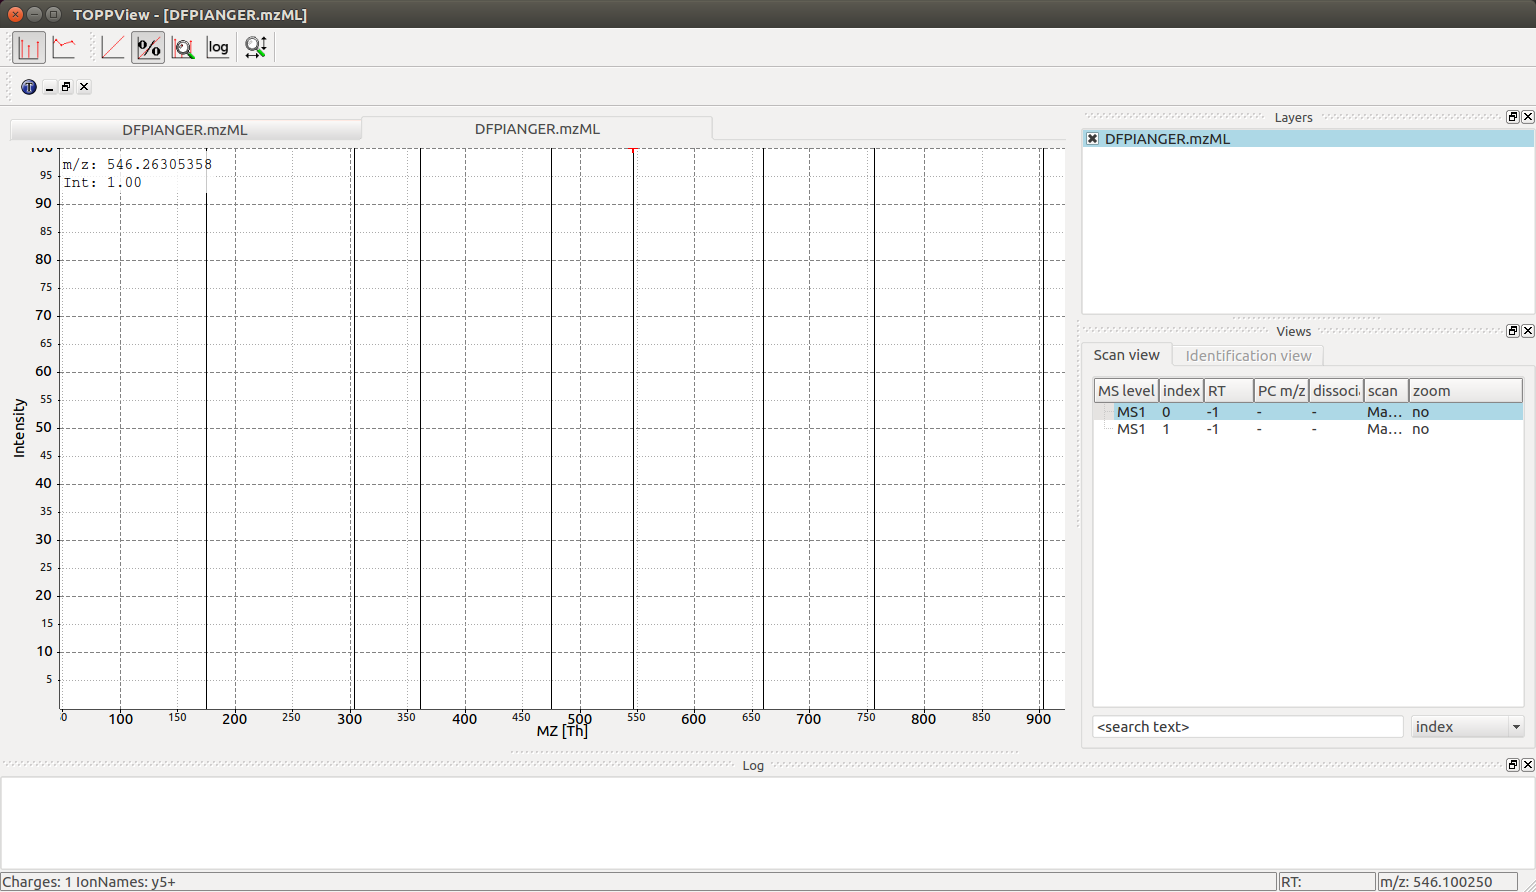

We can see all eight y ion peaks that are produced in the
TheoreticalSpectrumGenerator and when we hover over one of the peaks
(546 mz in this example) there is an annotation in the bottom left
corner that indicates charge state and ion name (`y5+` for every peak).
The larger spectrum with 146 peaks can also be interactively
investigated with TOPPView (the second spectrum in the file):

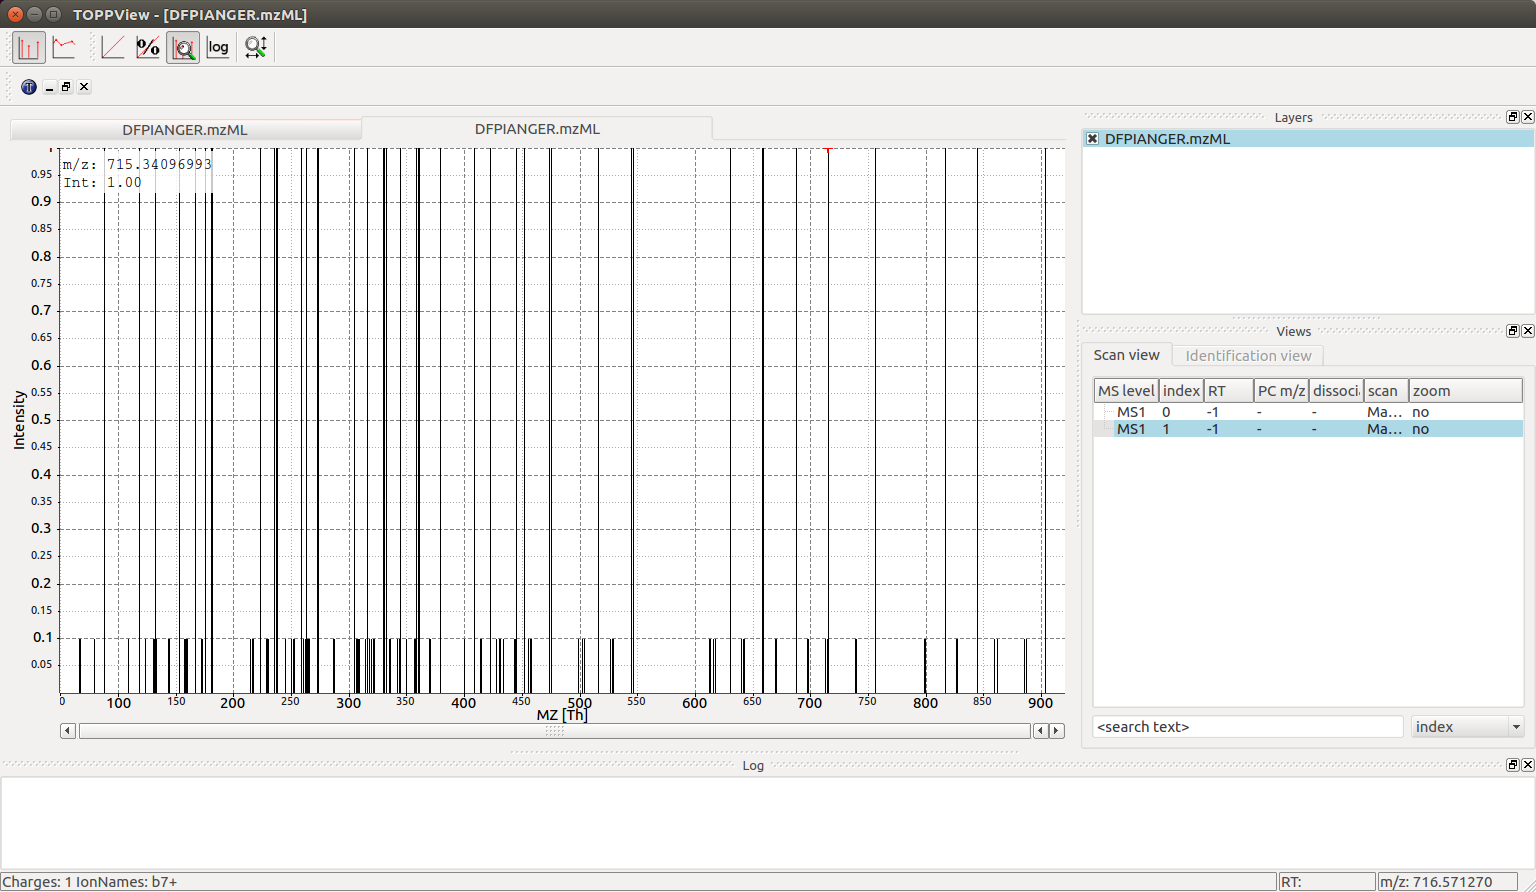

There are substantially more peaks here and the spectrum is much busier,
with singly and double charged peaks of the b, y and a series creating
44 different individual fragment ion peaks as well as neutral losses
adding an additional 102 peaks (neutral losses easily recognizable by
their 10-fold lower intensity in the simulated spectrum).